In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [3]:

def read_scn_single_file_no_ss(path, CT="0", ST="0"):
    adata = sc.read_csv(path, first_column_names=True).T
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata.obs["CT"] = CT
    adata.obs["ST"] = ST
    return adata


def get_ct_from_path(path):
    ct_string = path.split("_")[1].split(".")[0]
    ct_number = int(ct_string[2:])
    ct_number %= 24
    return str(ct_number).zfill(2)


def read_all_scn():
    paths = [
        "SCN/GSM3290582_CT14.csv",
        "SCN/GSM3290583_CT18.csv",
        "SCN/GSM3290584_CT22.csv",
        "SCN/GSM3290585_CT26.csv",
        "SCN/GSM3290586_CT30.csv",
        "SCN/GSM3290587_CT34.csv",
        "SCN/GSM3290588_CT38.csv",
        "SCN/GSM3290589_CT42.csv",
        "SCN/GSM3290590_CT46.csv",
        "SCN/GSM3290591_CT50.csv",
        "SCN/GSM3290592_CT54.csv",
        "SCN/GSM3290593_CT58.csv",
    ]
    adatas = [
        read_scn_single_file_no_ss(path, get_ct_from_path(path)) for path in paths
    ]
    adata = adatas[0].concatenate(adatas[1:])
    return adata


<h3>Initializing adata object</h3>

In [4]:
adata = read_all_scn()

In [ ]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


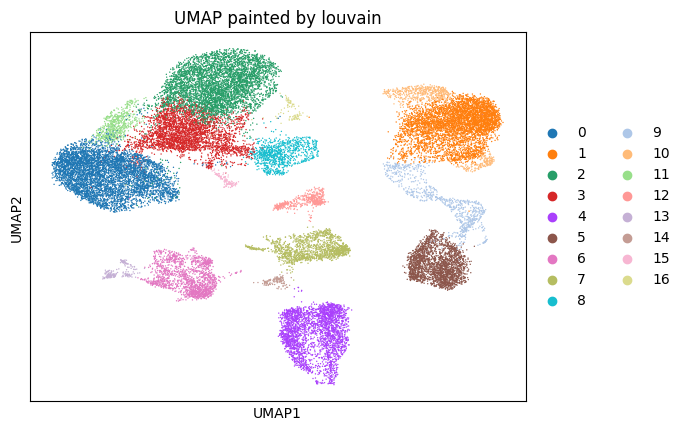

/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


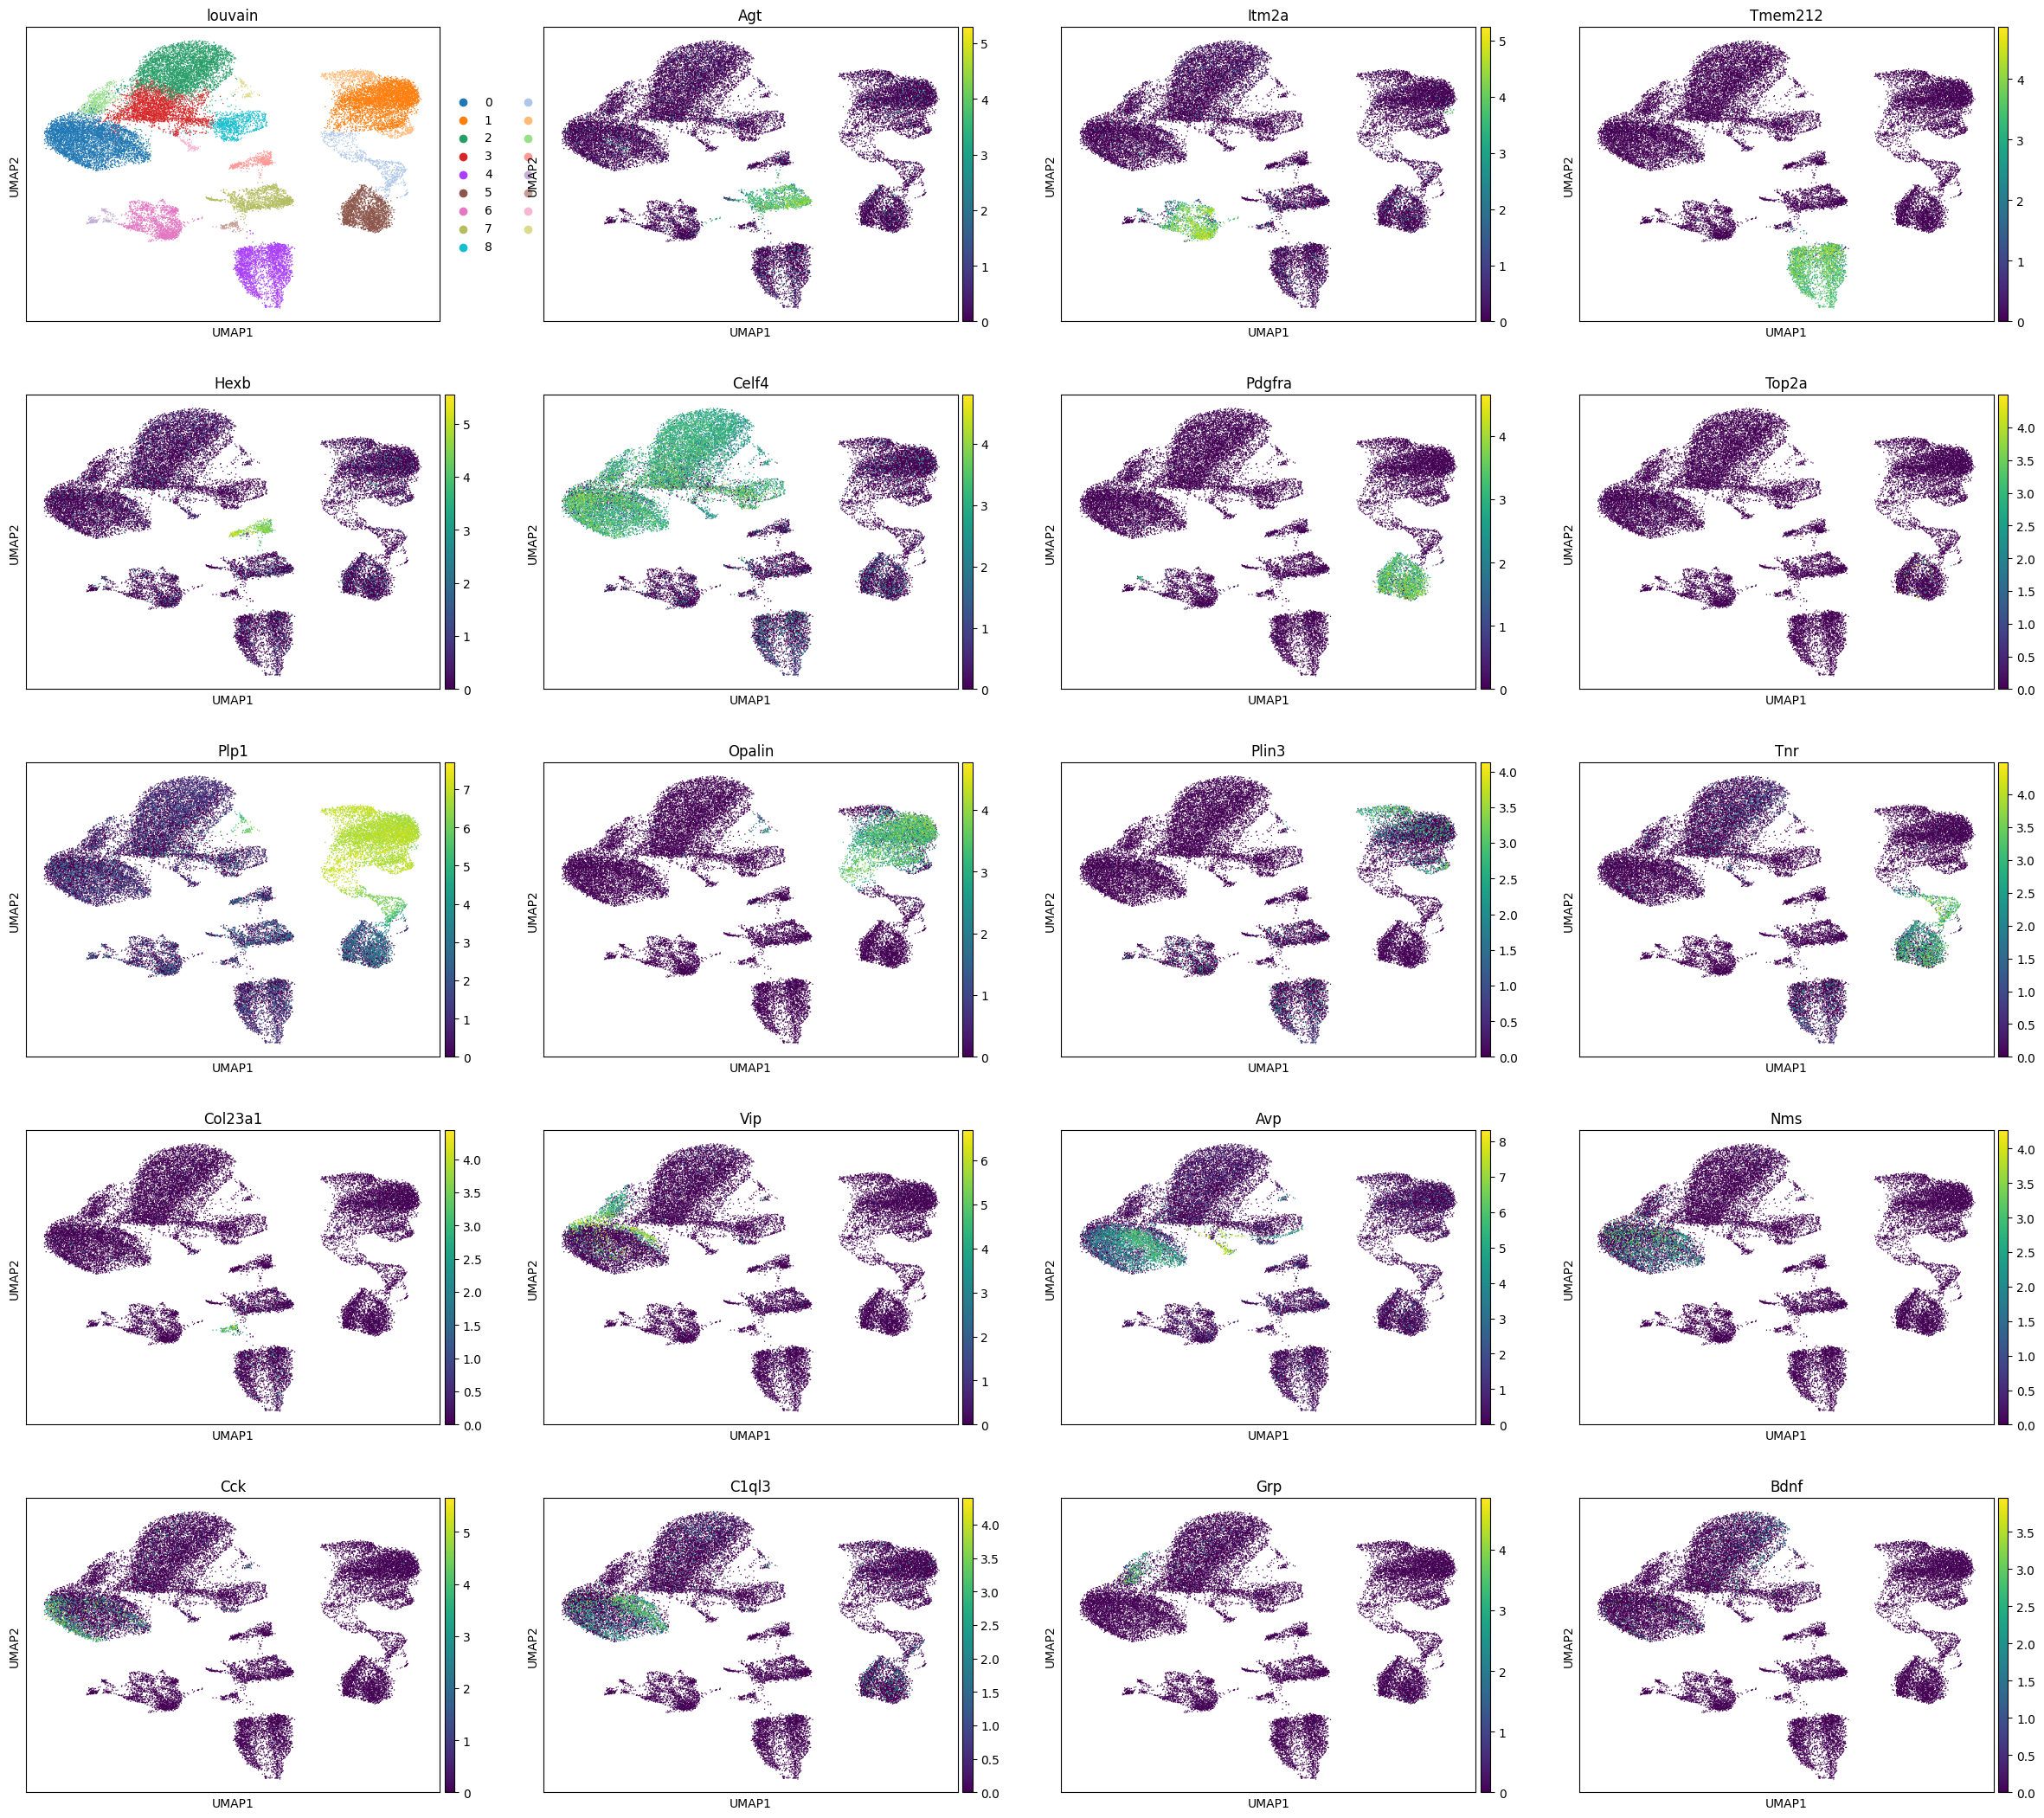

/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping

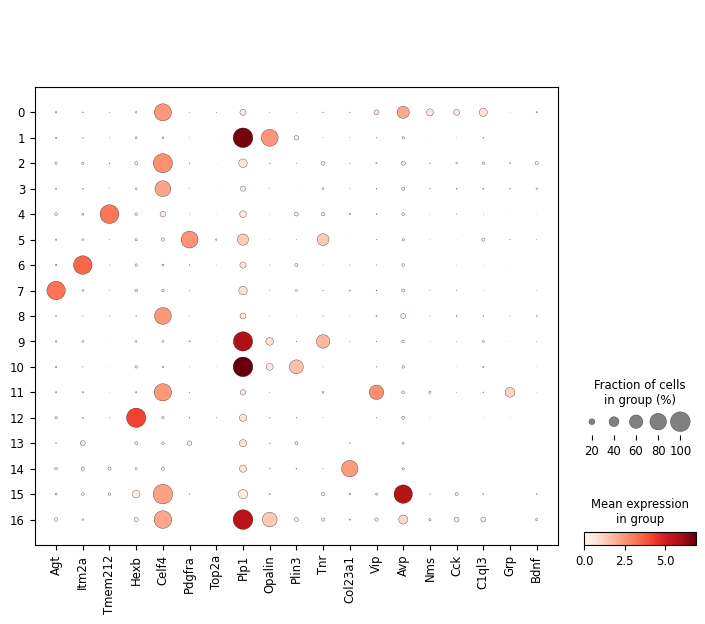

In [ ]:
sc.tl.louvain(adata, resolution=0.7)
sc.tl.umap(adata)
sc.pl.umap(adata, color='louvain' , title=("UMAP painted by louvain"))
marker_genes = ['Agt', 'Itm2a','Tmem212','Hexb','Celf4','Pdgfra','Top2a','Plp1','Opalin','Plin3','Tnr','Col23a1','Vip','Avp','Nms','Cck','C1ql3','Grp','Bdnf']
sc.pl.umap(adata, color=['louvain']+marker_genes)
sc.pl.dotplot(adata, marker_genes, groupby='louvain')

/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


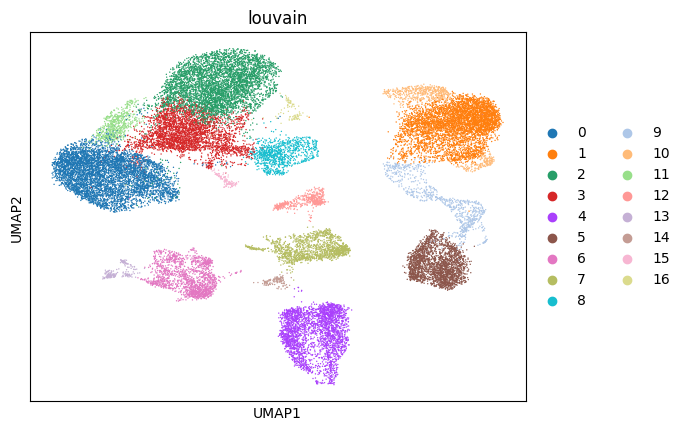

In [9]:

sc.pl.umap(adata, color=['louvain'])

In [ ]:

new_cluster_names = [
    "Neutons1",
    "Oligodendrocytes1",
    "Neurons3",
    "Neurons2",
    "Ependymal",
    "NG2",
    "Endothelial",
    "Astrocytes",
    "Neurons4",
    "Oligodendrocytes3",
    "Oligodendrocytes2",
    "Neurons5",
    "Microglia",
    "not_real",
    "Tanycytes",
    "Neurons6",
    "Neurons7",
]
adata.rename_categories("louvain", new_cluster_names)



/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shahareliyahu/Desktop/lab/scanpy-tutorials-master/env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


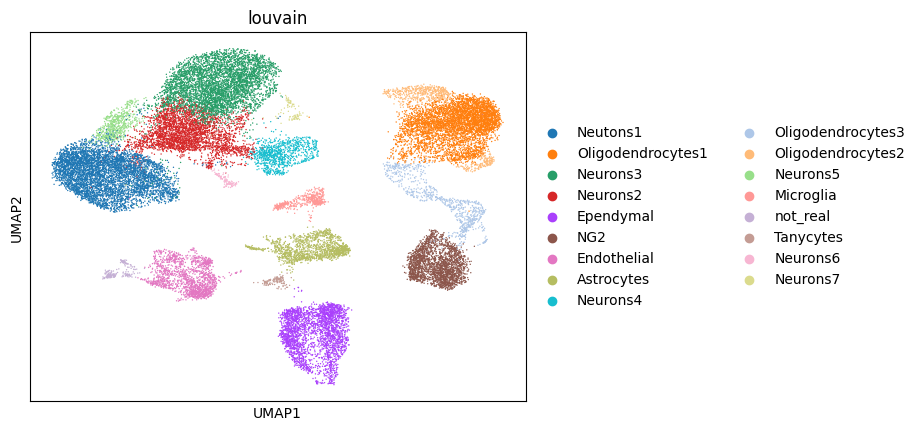

In [ ]:
sc.pl.umap(adata, color=['louvain'])
orig_adata = adata.copy()

In [13]:

clusters = adata.obs['louvain'].unique()
cts = adata.obs['CT'].unique()

In [14]:
from numpy import linalg as LA

def von_ne(M):
    e, _ = LA.eig(M)
    e=e[e>0.0000001]
    e = e/np.sum(e)
    t = e * np.log(e)
    return -np.sum(t)

In [62]:

result_dict = {}
k = 100
clusters_to_check =['Ependymal', 'Endothelial']
n_samples = [ 300,150]
for cluster_num,cluster in enumerate(clusters_to_check) :  
    sample_size = n_samples[cluster_num]
    result_dict[cluster] = []
    for ct in cts:
        entropies=np.zeros(k)
        for i in range(k):
            subset = adata[(adata.obs['louvain'] == cluster) & (adata.obs['CT'] == ct)]
            sc.pp.subsample(subset, n_obs=sample_size, random_state=i)
            expression_matrix = subset.X
            cov = (expression_matrix @ expression_matrix.T)
            vn_entropy = von_ne(cov)
            entropies[i] = vn_entropy
        result_dict[cluster].append(entropies)
        


In [63]:
print(result_dict.keys())

dict_keys(['Ependymal', 'Endothelial'])


[4.12771654 4.12771702 4.12771654 4.12771654 4.12771702 4.12771654
 4.12771654 4.12771702 4.12771654 4.12771702 4.12771702 4.12771654
 4.12771654 4.12771702 4.12771654 4.12771654 4.12771654 4.12771702
 4.12771702 4.12771654 4.12771654 4.12771654 4.12771702 4.12771702
 4.12771654 4.12771654 4.12771702 4.12771654 4.12771654 4.12771654
 4.12771654 4.12771702 4.12771654 4.12771654 4.12771702 4.12771702
 4.12771654 4.12771654 4.12771654 4.12771654 4.12771702 4.12771654
 4.12771654 4.12771654 4.12771702 4.12771654 4.12771654 4.12771654
 4.12771654 4.12771654 4.12771702 4.12771702 4.12771702 4.12771702
 4.12771654 4.12771654 4.12771654 4.12771654 4.12771702 4.12771654
 4.12771654 4.12771654 4.12771654 4.12771702 4.12771654 4.12771654
 4.12771702 4.12771702 4.12771654 4.12771654 4.12771654 4.12771702
 4.12771654 4.12771654 4.12771654 4.12771654 4.12771702 4.12771654
 4.12771702 4.12771654 4.12771654 4.12771654 4.12771702 4.12771654
 4.12771654 4.12771702 4.12771654 4.12771702 4.12771702 4.1277

/var/folders/c4/wctb__gj70v0_v8tlv9zqdnr0000gn/T/ipykernel_51113/2510017763.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cts)


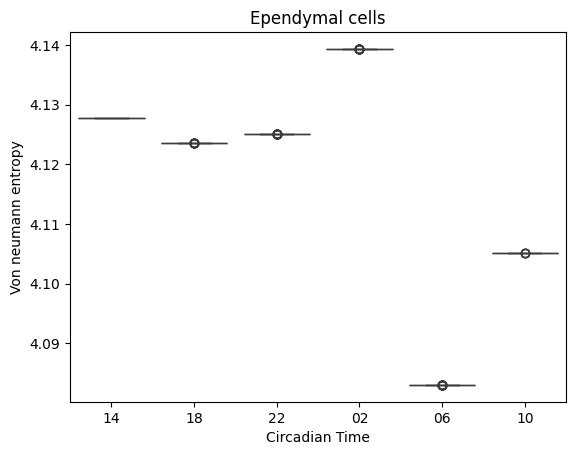

[4.20655155 4.20655107 4.20655155 4.20655155 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655107 4.20655155 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655203 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655203 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.20655107
 4.20655155 4.20655107 4.20655107 4.20655155 4.20655155 4.20655107
 4.20655155 4.20655203 4.20655155 4.20655155 4.20655155 4.20655107
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155
 4.20655107 4.20655155 4.20655155 4.20655155 4.20655155 4.20655107
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655107 4.20655155
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.20655107
 4.20655155 4.20655107 4.20655155 4.20655155 4.20655107 4.20655107
 4.20655155 4.20655155 4.20655155 4.20655155 4.20655155 4.2065

/var/folders/c4/wctb__gj70v0_v8tlv9zqdnr0000gn/T/ipykernel_51113/2510017763.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cts)


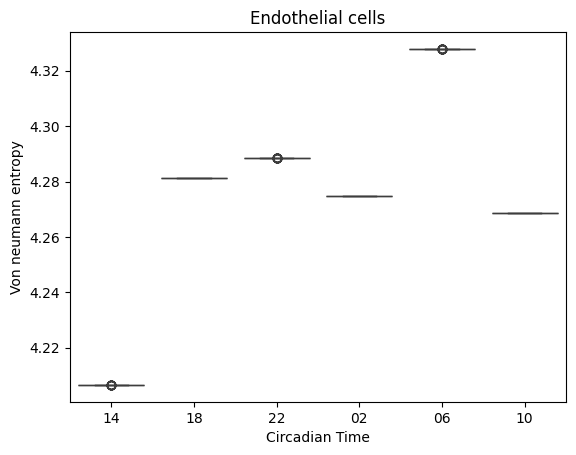

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Now we can create the box plots
for cluster in clusters_to_check:
    print(result_dict[cluster][0])
    ax = sns.boxplot(data=result_dict[cluster])
    ax.set_xticklabels(cts)
    ax.set_xlabel('Circadian Time')
    ax.set_ylabel('Von neumann entropy')
    plt.title(f'{cluster} cells')    
    plt.show()

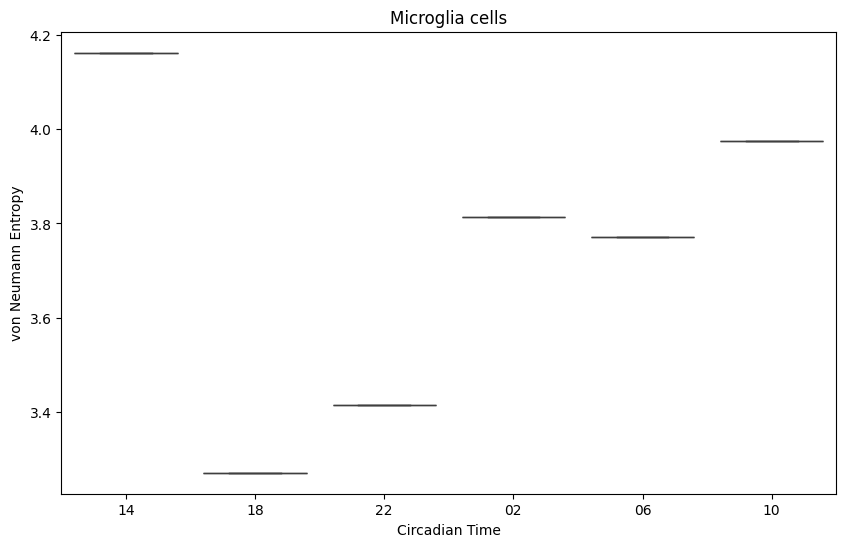

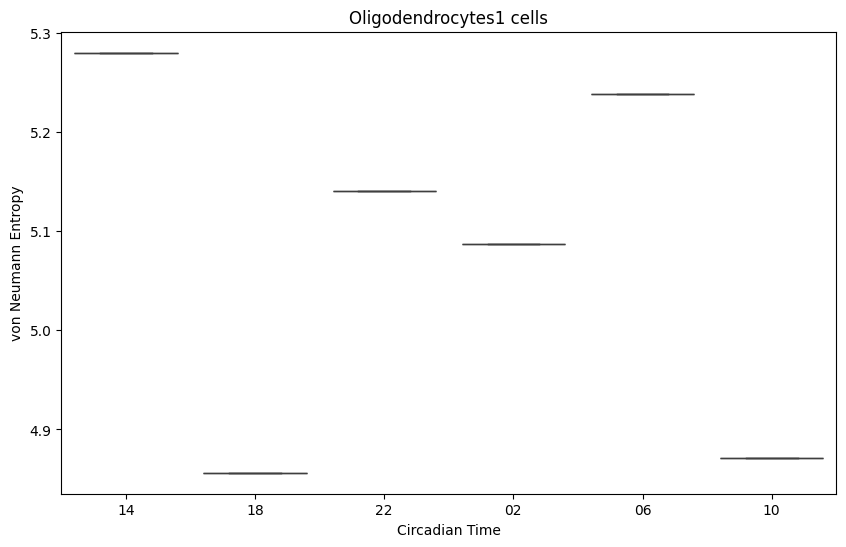

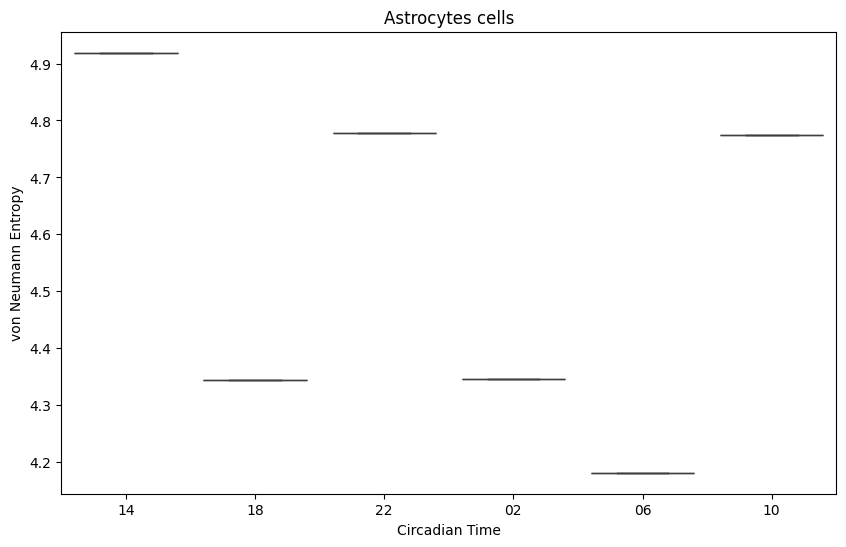

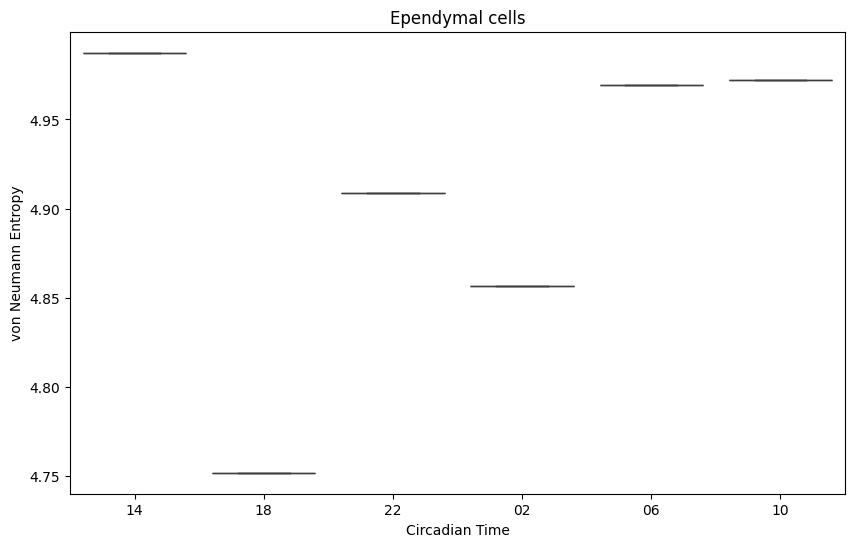

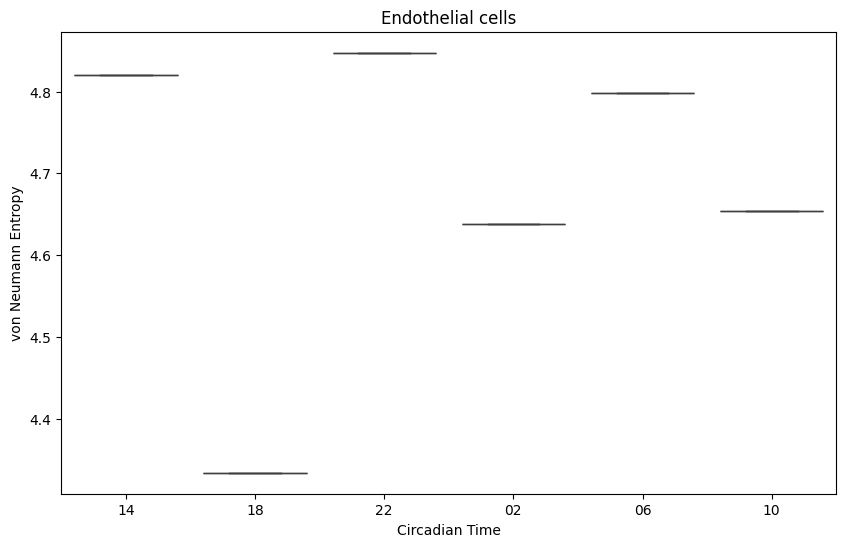

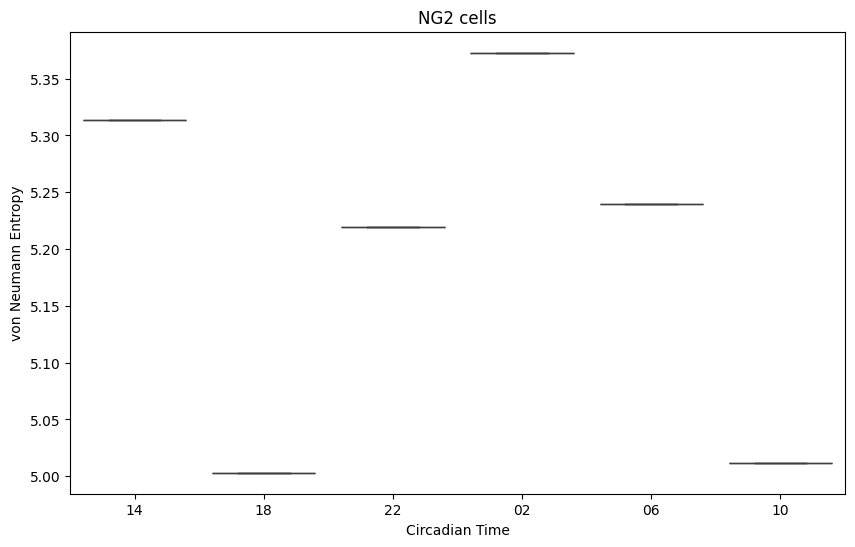

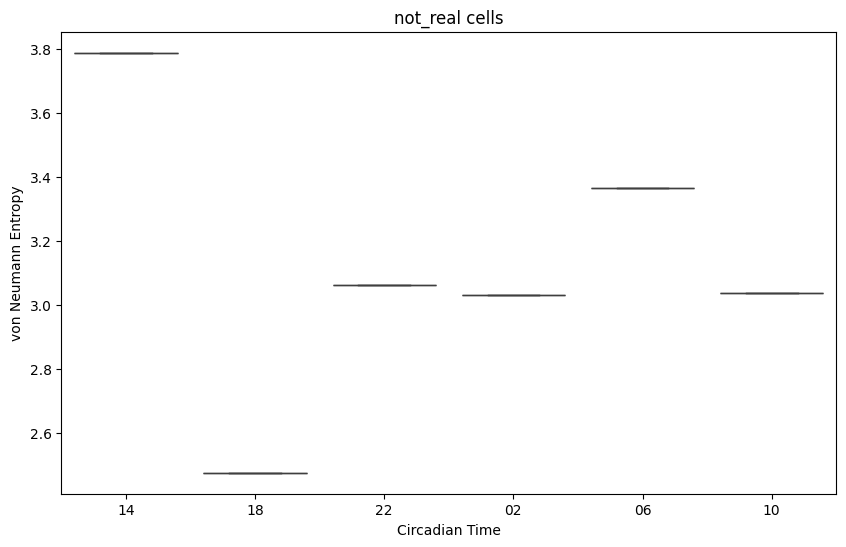

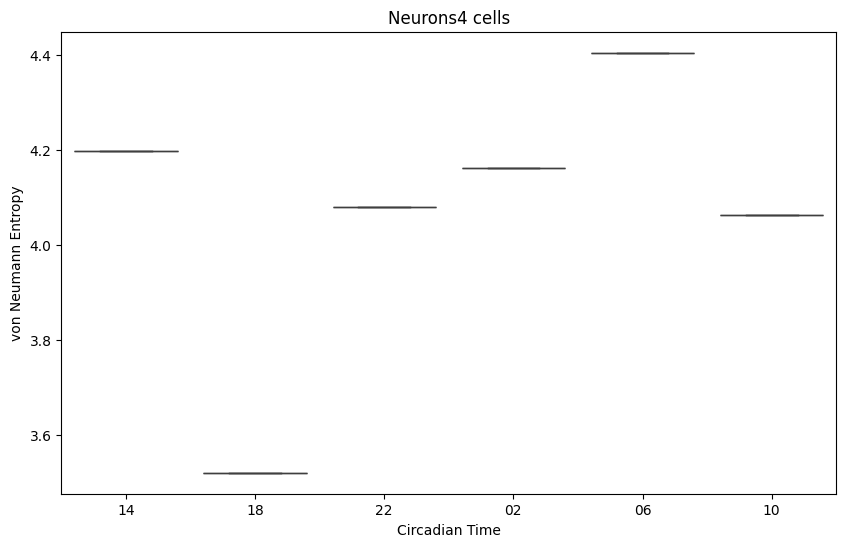

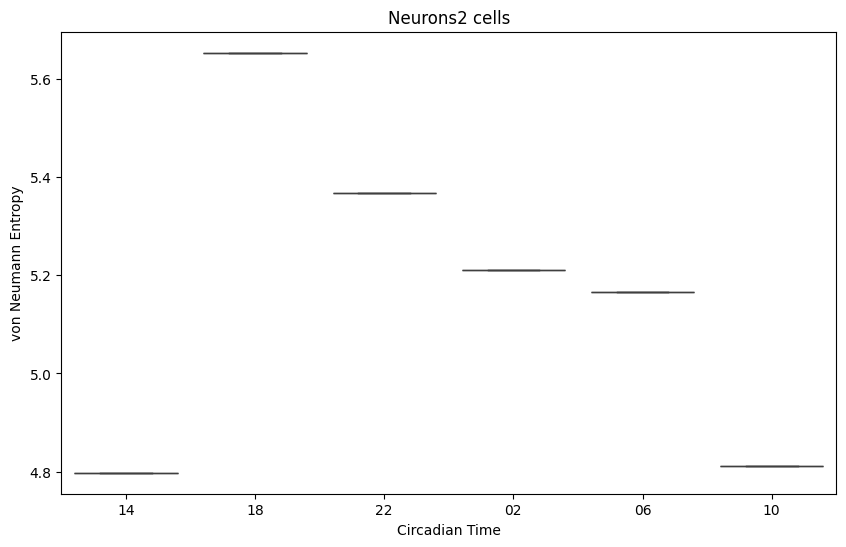

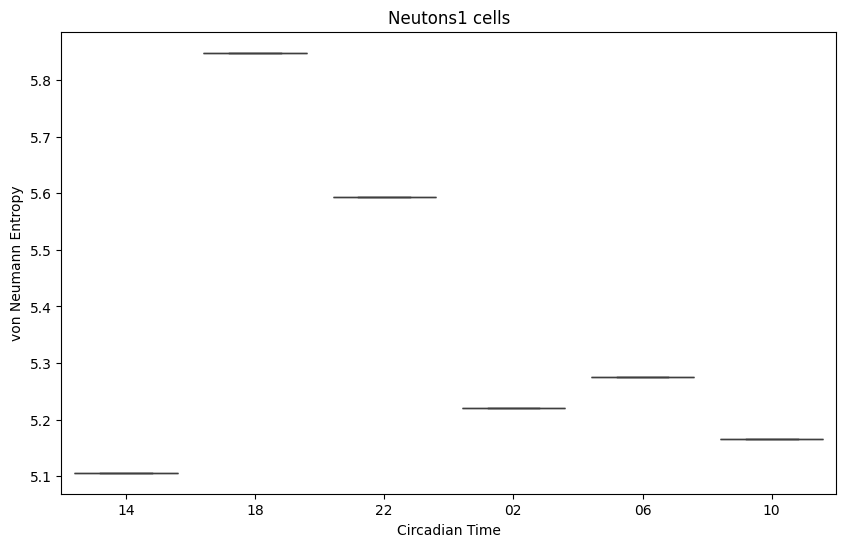

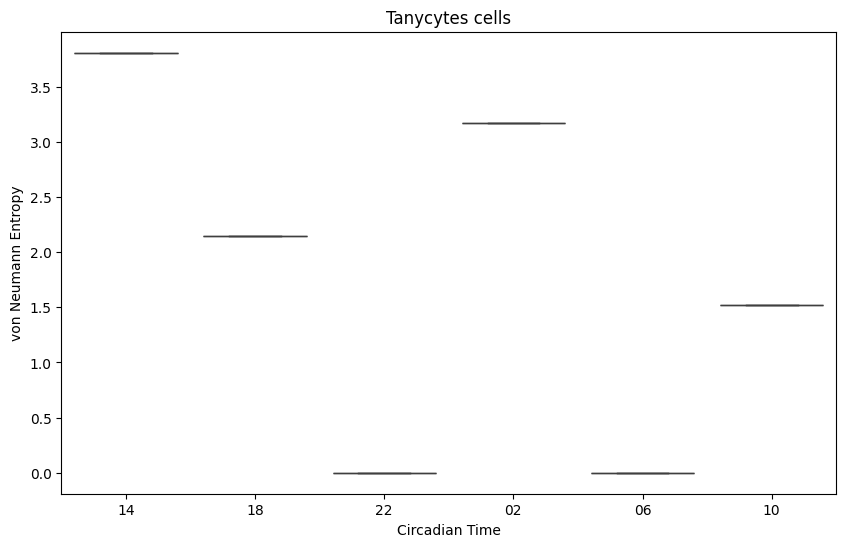

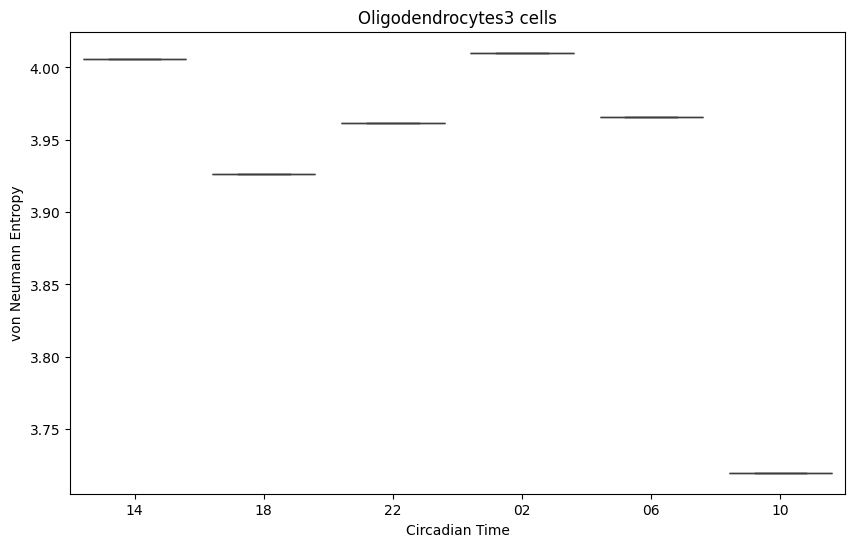

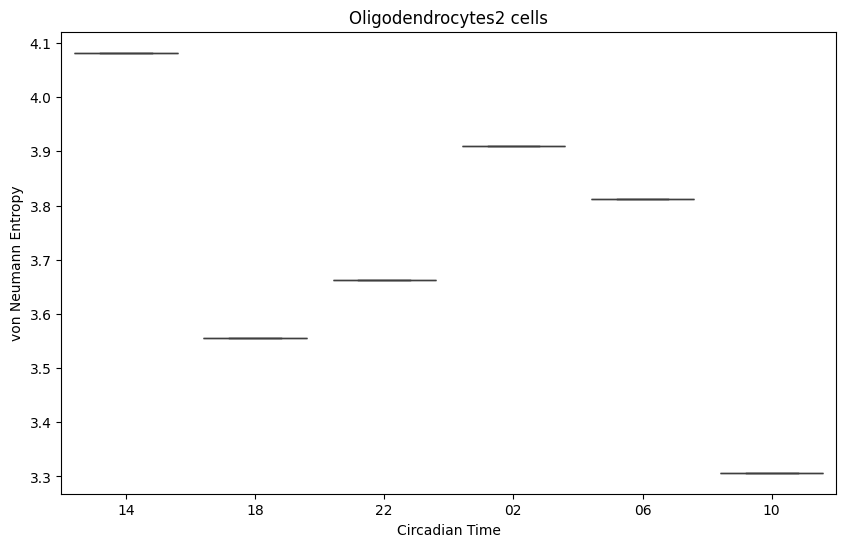

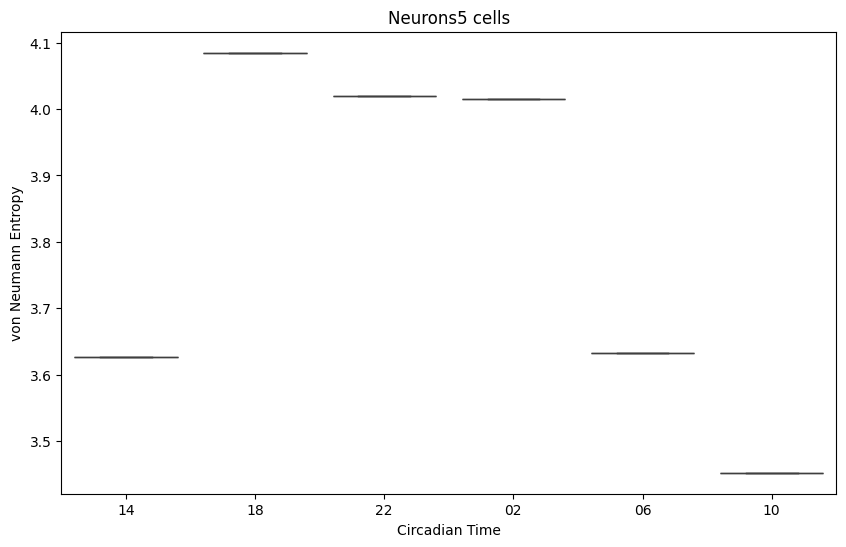

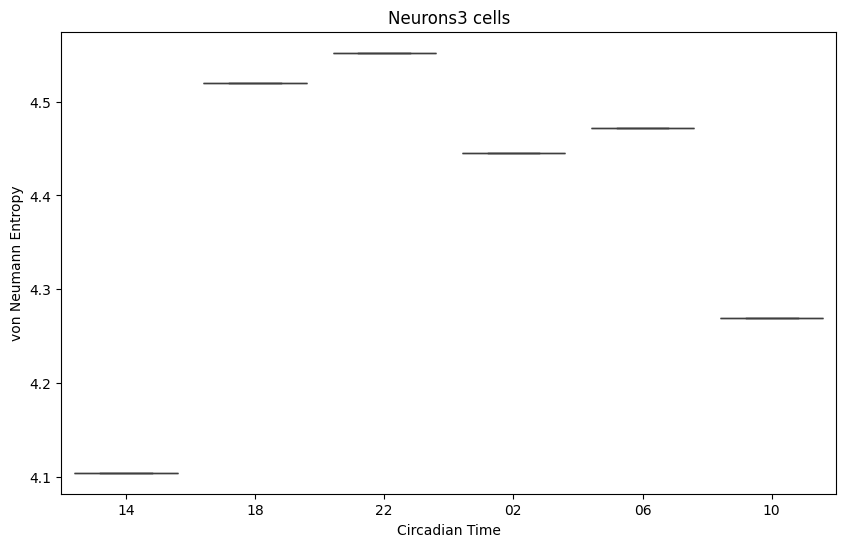

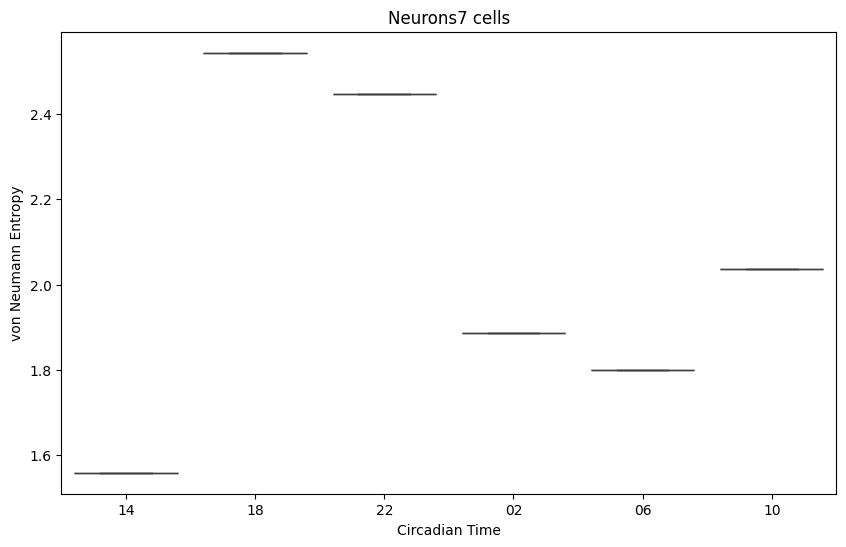

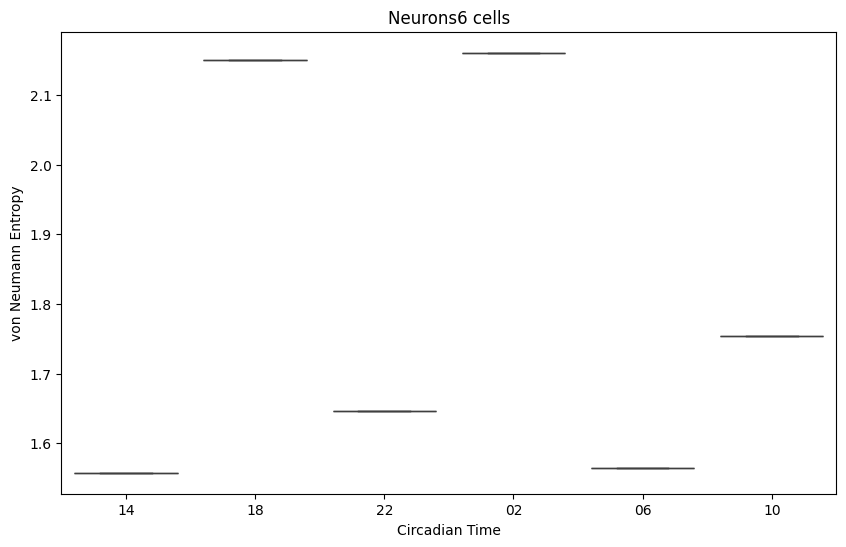

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for cell_type in clusters:
    subset_df = entropy_df[entropy_df['Cluster'] == cell_type]
    
    plt.figure(figsize=(10, 6))  # Adjust the size as needed
    sns.boxplot(data=subset_df, x='CT', y='Entropy')
    
    plt.title(f'{cell_type} cells')
    plt.xlabel('Circadian Time')
    plt.ylabel('von Neumann Entropy')
    
    plt.show()